# Librerias y/o dependencias a utilizar

In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 

# Lectura del dataset de prueba

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/Trabajo de título/TT2/Red neuronal/'

Mounted at /content/drive/


In [3]:
#df = pd.read_csv(path + 'Dataset_de_prueba_oficial_1.csv', sep=';')
df = pd.read_csv(path + 'Dataset_de_prueba_oficial_2.csv', sep=';')
df

,Sexo,Edad,Segmento,SubSegmento,Segto_Agrup,Carterizado,Apertura,Hora_envio,Dia_semana,Mes_envio,RESPONDIDA
0,0.0,0.000000,0.0,0.6,0.5,0.0,0.000000,0.076923,1.000000,0.0,0.0
1,1.0,0.333333,0.0,0.2,0.5,0.0,0.166667,0.384615,1.000000,0.0,0.0
2,1.0,0.333333,1.0,1.0,1.0,0.0,0.000000,0.307692,1.000000,0.0,0.0
3,0.0,0.666667,0.5,0.4,0.0,0.0,0.000000,0.230769,1.000000,0.0,0.0
4,1.0,0.666667,0.5,0.4,1.0,0.0,0.000000,0.846154,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2499064,0.0,1.000000,0.5,0.0,0.0,1.0,0.166667,0.692308,0.166667,1.0,0.0
2499065,0.0,0.666667,0.5,0.0,0.0,1.0,0.666667,0.384615,0.333333,1.0,0.0
2499066,1.0,0.333333,0.0,0.8,0.5,0.0,0.166667,0.846154,0.333333,1.0,0.0
2499067,1.0,0.333333,0.0,0.2,0.5,1.0,0.000000,0.230769,0.000000,1.0,0.0


#Variables

###Independientes

In [4]:
variables_independientes = df.drop(['RESPONDIDA'], axis=1)
X = variables_independientes.values

In [5]:
variables_independientes.shape

(2499069, 10)

###Objetivo

In [6]:
variables_objetivo = df.drop(['Sexo', 'Edad', 'Segmento', 'SubSegmento', 'Segto_Agrup', 'Carterizado', 'Apertura', 'Hora_envio', 'Dia_semana', 'Mes_envio'], axis=1)
Y = variables_objetivo.values

In [7]:
variables_objetivo.shape

(2499069, 1)

# Analisis factorial

In [8]:
!pip install factor_analyzer==0.2.3

In [9]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer
chi_square_value,p_value=calculate_bartlett_sphericity(variables_independientes)

In [10]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(variables_independientes)

In [11]:
# Se crea el factor de analisis y el desempeño de este
fa = FactorAnalyzer()
fa.analyze(variables_independientes, 10, rotation=None)
# Se checkea el eigenvelues
ev, v = fa.get_eigenvalues()

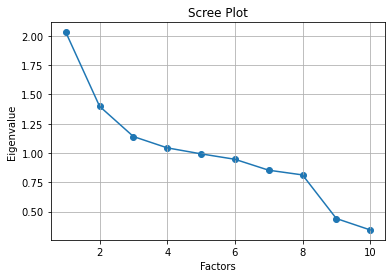

In [12]:
# Se grafica
plt.scatter(range(1,variables_independientes.shape[1]+1),ev)
plt.plot(range(1,variables_independientes.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [13]:
# Se crea el factor de analisis y el desempeño de este usando 4 factores
fa = FactorAnalyzer()
fa.analyze(variables_independientes, 4, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4
Sexo,-0.017706,0.006353,-0.077524,0.353410
Edad,-0.076473,-0.019652,0.348960,-0.074616
Segmento,0.086128,-0.025235,0.611610,-0.029805
SubSegmento,0.774242,0.019142,0.288261,0.202175
Segto_Agrup,0.673684,0.038902,-0.172115,0.044966
Carterizado,-0.684850,-0.062773,0.611551,0.023146
Apertura,-0.061446,0.009940,0.001513,-0.132145
Hora_envio,-0.000950,-0.085844,-0.002187,-0.009125
Dia_semana,-0.013000,0.997391,0.012390,-0.009035
Mes_envio,-0.030826,-0.112649,0.058073,0.062817


In [14]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4
SS Loadings,1.540794,1.021831,0.992096,0.196360
Proportion Var,0.154079,0.102183,0.099210,0.019636
Cumulative Var,0.154079,0.256262,0.355472,0.375108
